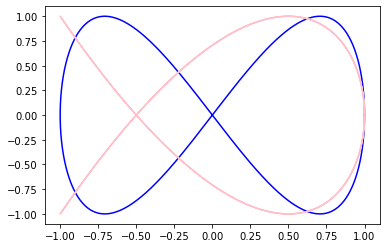

In [3]:
import numpy as np
from matplotlib.pyplot import figure, plot, show
from math import pi

t=np.arange(0, 4 * pi / 2, 0.001)

#first set of parameters
A = 1
B = 1
a1 = 1
b1 = 2
d = pi/2

#second set of parameters
a2 = 2
b2 = 3

X1 = A * np.sin(a1 * t + d)
Y1 = B * np.sin(b1 * t)

X2 = A * np.sin(a2 * t + d)
Y2 = B * np.sin(b2 * t)

figure()
plot(X1, Y1, color='blue')
plot(X2, Y2, color='pink')
show()

Фигуры Лиссажу